# Descriptive statistics and PCA Analysis for iris data in Python

In [1]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
Image(url ='https://image.ibb.co/gbH3ue/iris.png', width=700, height=700)

In [2]:
# toolboxes/libraries
import pandas as pd
import numpy as np
import scipy as sp

# Visualization libraries

import matplotlib.pyplot as plt 
import matplotlib
import seaborn as sns
sns.set(color_codes=True)

# import load_iris function from datasets module
from sklearn.datasets import load_iris
%matplotlib inline

In [3]:
# save load_iris() sklearn dataset to iris
# if you'd like to check dataset type use: type(load_iris())
# if you'd like to view list of attributes use: dir(load_iris())
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [4]:
dir(load_iris())  # view list of attributes 

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [5]:
# reformat to data frame
df = pd.DataFrame(
    iris['data'], columns=iris['feature_names']
).assign(Species=iris['target_names'][iris['target']])

with pd.option_context('expand_frame_repr', False):
    print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm) Species
0                5.1               3.5                1.4               0.2  setosa
1                4.9               3.0                1.4               0.2  setosa
2                4.7               3.2                1.3               0.2  setosa
3                4.6               3.1                1.5               0.2  setosa
4                5.0               3.6                1.4               0.2  setosa


In [6]:
# data from seaborn
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
#iris_df=pd.read_csv("~/Documents/iris.csv")
iris_df=pd.read_csv("https://static.bigml.com/csv/iris.csv")
print(type(iris_df))

<class 'pandas.core.frame.DataFrame'>


In [8]:
iris_df.head() # show first 5 rows

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# rename  columns
iris_df.rename(columns={'sepal length':'sepal-length','sepal width':'sepal-width','petal length':'petal-length','petal width':'petal-width'},inplace=True)

In [10]:
iris_df.info() # show data type of each attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [11]:
iris_df.describe() # show common statistics

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
# get unique calss labels
a=iris_df['species'].unique()
a

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
# others statistics

listOfColumns = iris_df.columns.tolist()
listOfColumns = listOfColumns[0:4]
#listOfColumns
more_stat=iris_df[listOfColumns].agg(['median','mad','sem','skew', 'kurt'])
more_stat

,sepal-length,sepal-width,petal-length,petal-width
median,5.800000,3.000000,4.350000,1.300000
mad,0.687556,0.336782,1.562747,0.658133
sem,0.067611,0.035588,0.144136,0.062236
skew,0.314911,0.318966,-0.274884,-0.102967
kurt,-0.552064,0.228249,-1.402103,-1.340604


In [14]:
# put together
stat=iris_df.describe()
stat2=pd.concat([stat,more_stat])
stat2

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
median,5.800000,3.000000,4.350000,1.300000
mad,0.687556,0.336782,1.562747,0.658133


In [15]:
iris_df.groupby('species').describe().transpose()

species             Iris-setosa  Iris-versicolor  Iris-virginica
sepal-length count    50.000000        50.000000       50.000000
             mean      5.006000         5.936000        6.588000
             std       0.352490         0.516171        0.635880
             min       4.300000         4.900000        4.900000
             25%       4.800000         5.600000        6.225000
             50%       5.000000         5.900000        6.500000
             75%       5.200000         6.300000        6.900000
             max       5.800000         7.000000        7.900000
sepal-width  count    50.000000        50.000000       50.000000
             mean      3.428000         2.770000        2.974000
             std       0.379064         0.313798        0.322497
             min       2.300000         2.000000        2.200000
             25%       3.200000         2.525000        2.800000
             50%       3.400000         2.800000        3.000000
             75%       3.675000         3.000000        3.175000
             max       4.400000         3.400000        3.800000
petal-length count    50.000000        50.000000       50.000000
             mean      1.462000         4.260000        5.552000
             std       0.173664         0.469911        0.551895
             min       1.000000         3.000000        4.500000
             25%       1.400000         4.000000        5.100000
             50%       1.500000         4.350000        5.550000
             75%       1.575000         4.600000        5.875000
             max       1.900000         5.100000        6.900000
petal-width  count    50.000000        50.000000       50.000000
             mean      0.246000         1.326000        2.026000
             std       0.105386         0.197753        0.274650
             min       0.100000         1.000000        1.400000
             25%       0.200000         1.200000        1.800000
             50%       0.200000         1.300000        2.000000
             75%       0.300000         1.500000        2.300000
             max       0.600000         1.800000        2.500000

In [16]:
iris_df.isna().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
species         0
dtype: int64

In [17]:
iris_df.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
species         0
dtype: int64

In [18]:
print(type(iris_df))

<class 'pandas.core.frame.DataFrame'>


In [19]:
# examine duplicated rows
# keep='first'
# mark duplicates as True except for the first occurence
iris_df.loc[iris_df.duplicated(keep="first"),:]

,sepal-length,sepal-width,petal-length,petal-width,species
142,5.8,2.7,5.1,1.9,Iris-virginica


In [20]:
def check_obj_columns(dfx):
    tdf = dfx.select_dtypes(include=['object']).applymap(type)
    for col in tdf:
        if len(set(tdf[col].values)) > 1:
            print("Column {} has mixed object types.".format(col))
        else:
            print("No mixed object types")

check_obj_columns(iris_df)

No mixed object types


In [21]:
duplicateRowsDF = iris_df[iris_df.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
     sepal-length  sepal-width  petal-length  petal-width         species
142           5.8          2.7           5.1          1.9  Iris-virginica


In [22]:
# drops the duplicated rows
iris_df.drop_duplicates(keep="first",inplace=True)  # To avoid reassignment, use (inplace = True)
iris_df.info()
#iris_df.dtypes
print(type(iris_df))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    149 non-null float64
sepal-width     149 non-null float64
petal-length    149 non-null float64
petal-width     149 non-null float64
species         149 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
<class 'pandas.core.frame.DataFrame'>


In [23]:
iris_df.groupby('species').sum()

,sepal-length,sepal-width,petal-length,petal-width
species,,,,
Iris-setosa,250.3,171.4,73.1,12.3
Iris-versicolor,296.8,138.5,213.0,66.3
Iris-virginica,323.6,146.0,272.5,99.4


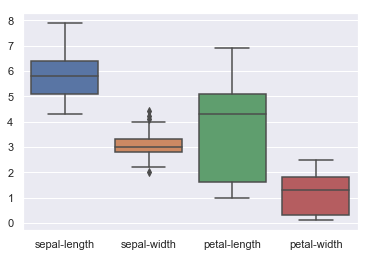

In [24]:
sns.boxplot(data=iris_df.iloc[:,0:4])
#sns.plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000163702EDF60>,
      dtype=object)

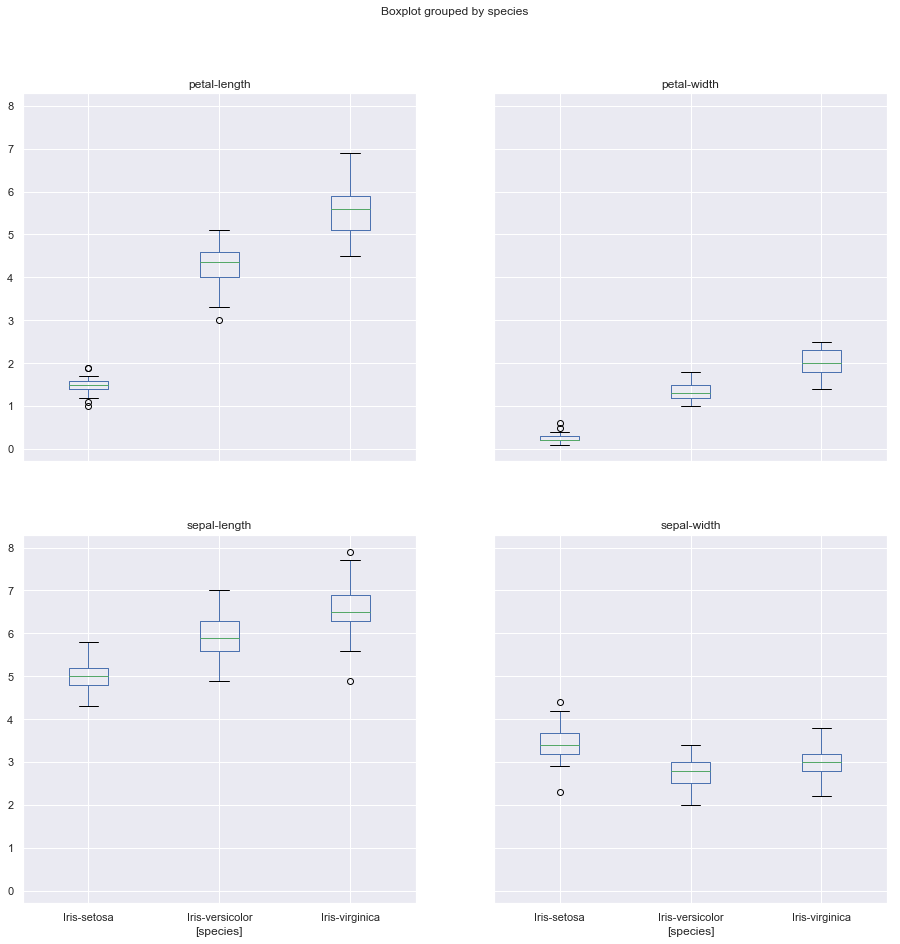

In [25]:
# https://www.kaggle.com/gopaltirupur/iris-data-analysis-and-machine-learning-python/data
iris_df.boxplot(by='species',figsize=(15,15))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


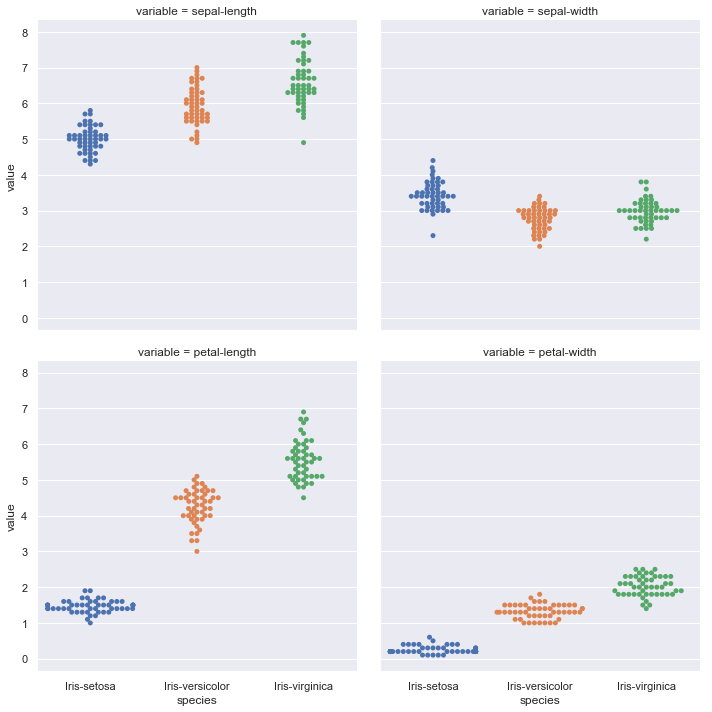

In [26]:
# Bee swarm plot
# http://people.duke.edu/~ccc14/cfar-data-2016/Customizing_Plots_Solutions.html#Customizing-seaborn-graphics
data = pd.melt(iris_df, id_vars='species')
sns.factorplot(data=data, x='species', y='value', col='variable', col_wrap=2, kind='swarm')
pass

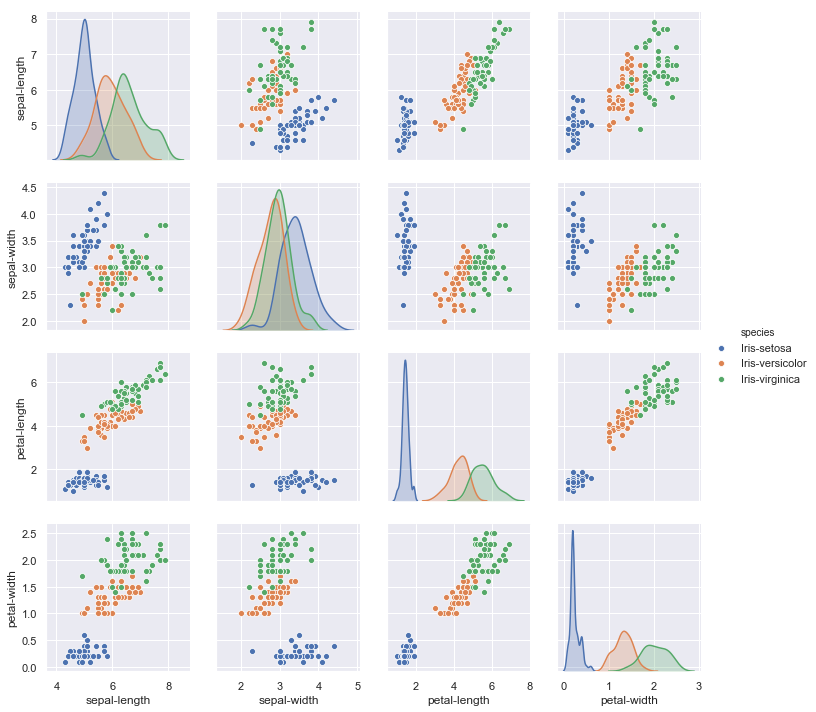

In [27]:
#Scatterplot Matrix
sns.pairplot(iris_df, hue="species")

In [28]:
iris_df.groupby('species').corr()

sepal-length  sepal-width  petal-length  \
species                                                                 
Iris-setosa     sepal-length      1.000000     0.742547      0.267176   
                sepal-width       0.742547     1.000000      0.177700   
                petal-length      0.267176     0.177700      1.000000   
                petal-width       0.278098     0.232752      0.331630   
Iris-versicolor sepal-length      1.000000     0.525911      0.754049   
                sepal-width       0.525911     1.000000      0.560522   
                petal-length      0.754049     0.560522      1.000000   
                petal-width       0.546461     0.663999      0.786668   
Iris-virginica  sepal-length      1.000000     0.445797      0.862951   
                sepal-width       0.445797     1.000000      0.392242   
                petal-length      0.862951     0.392242      1.000000   
                petal-width       0.274282     0.534810      0.317198   

                              petal-width  
species                                    
Iris-setosa     sepal-length     0.278098  
                sepal-width      0.232752  
                petal-length     0.331630  
                petal-width      1.000000  
Iris-versicolor sepal-length     0.546461  
                sepal-width      0.663999  
                petal-length     0.786668  
                petal-width      1.000000  
Iris-virginica  sepal-length     0.274282  
                sepal-width      0.534810  
                petal-length     0.317198  
                petal-width      1.000000

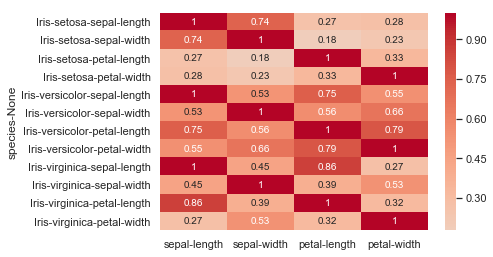

In [29]:
sns.heatmap(iris_df.groupby('species').corr(),annot=True,cmap='coolwarm',center=0)

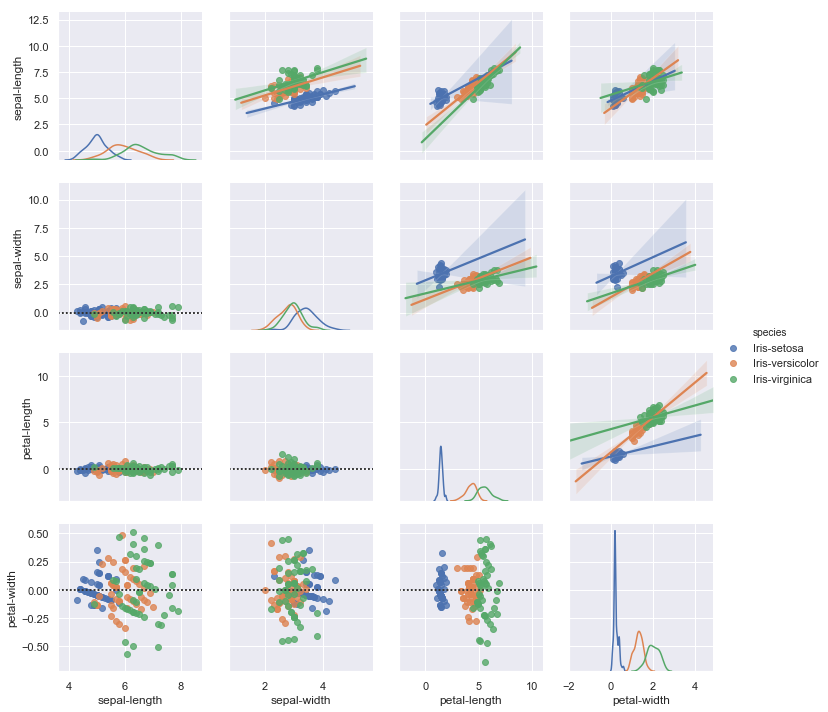

In [30]:
g = sns.PairGrid(iris_df, hue="species")
g.map_diag(sns.kdeplot)
g.map_upper(sns.regplot)
g.map_lower(sns.residplot)
g.add_legend();

# Confidence Intervals (https://pradeepadhokshaja.blogspot.com/2016/08/analysis-of-iris-data-set.html)
We see from visualizing the data that the species virginica and versicolor seem to be pretty close to each other in some physical aspects. The data contains 150 samples , of which , each species comprise of 50 instances. Is this closeness true in nature?
Before we conduct a t-test, we lay down a few assumptions about the data.
The samples that are collected are independent of each other within species
The samples that are collected are independent of each other
The sample is large enough to compensate for the skew in population distribution.

As we have no information regarding the population parameters, we look into the t-distribution for answers. We will use the sample mean and  sample standard deviation as estimates for the population parameters. With 95% confidence, what can we say about the difference in the mean petal lengths of versicolor and virginica?

create 2 data frames that are subsets of the original data where each data frame only contains data for a respective flower species. The index’s should be reset so the residuals can be calculated later

In [31]:
virginica = iris_df[(iris_df['species'] == 'Iris-virginica')]
virginica.reset_index(inplace= True)

versicolor = iris_df[(iris_df['species'] == 'Iris-versicolor')]
versicolor.reset_index(inplace= True)

In [32]:
# test for Homoscedasticity (having the same population variance)
# Bartlett’s test tests the null hypothesis that all input samples are from populations with equal variances.
sp.stats.bartlett(virginica['petal-length'] ,versicolor['petal-length'])

BartlettResult(statistic=1.2881129831548672, pvalue=0.25639599523991596)

In [33]:
# check Homogeneity of variances
# A better approach than Bartlett's test it to use Levene's test
# which returns a tuple where the first element is W , the test's statistic, and the second element is the p-value for the test.
sp.stats.levene(virginica['petal-length'], versicolor['petal-length'])

LeveneResult(statistic=0.9944598304213452, pvalue=0.3211359942068347)

The test is not significant meaning there is homogeneity of variances

In [34]:
#  We can test the assumption of normality using the stats.shapiro()
sp.stats.shapiro(virginica['petal-length'])

(0.9655249118804932, 0.15974092483520508)

In [35]:
sp.stats.shapiro(versicolor['petal-length'])

(0.9660047888755798, 0.1584833413362503)

The first value in the tuple is the W test statistic, and the second value is the p-value.
The W statistic is 0.96. The p-value = 0.15 > .05 = α shows that there are no grounds for rejecting the null hypothesis that the data is normally distributed.
Sample looks Gaussian (fail to reject H0)
Neither of the variables of interest violates the assumption of normality

In [36]:
virginica = iris_df[(iris_df['species'] == 'Iris-virginica')]
virginica.reset_index(inplace= True)

versicolor = iris_df[(iris_df['species'] == 'Iris-versicolor')]
versicolor.reset_index(inplace= True)

In [37]:
#T-test is used to check whether two groups have the same mean (measurement)
# Welch’s t-test Example
# The first value in the tuple is the W test statistic, and the second value is the p-value.

sp.stats.ttest_ind(virginica['petal-length'], versicolor['petal-length'], equal_var = False)

Ttest_indResult(statistic=12.5951550873198, pvalue=6.966622921087528e-22)

The p-value is significant, therefore one can reject the null hypothesis in support of the alternative.

In [38]:
# https://pythonfordatascience.org/welch-t-test-python-pandas/
def welch_ttest(x, y): 
    ## Welch-Satterthwaite Degrees of Freedom ##
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
   
    t, p = sp.stats.ttest_ind(x, y, equal_var = False)
    
    print("\n",
          f"Welch's t-test= {t:.4f}", "\n",
          f"p-value = {p:.4f}", "\n",
          f"Welch-Satterthwaite Degrees of Freedom= {dof:.4f}")

welch_ttest(virginica['petal-length'], versicolor['petal-length'])


 Welch's t-test= 12.5952 
 p-value = 0.0000 
 Welch-Satterthwaite Degrees of Freedom= 93.8645


https://jcoliver.github.io/learn-r/002-intro-stats.html#solution-to-challenge-2

Use ANOVA to test for differences in sepal width among the three species. What is the value of the F-statistic?

https://medium.com/@rrfd/f-tests-and-anovas-examples-with-the-iris-dataset-fe7caa3e21d0
 it is necessary for these properties to hold when performing an F-test.

    Data is normally distributed;
    The samples are independent of one another, and;
    The population standard deviations of the groups are homoscedastic.

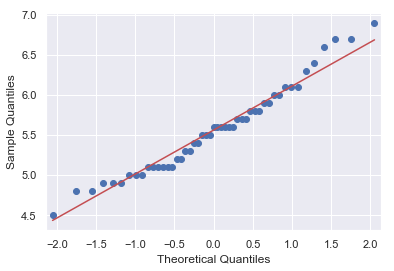

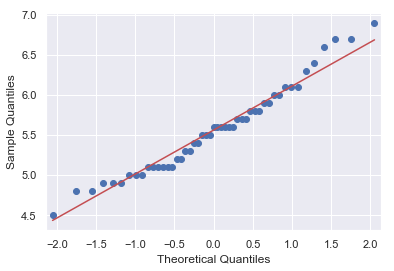

In [39]:
from statsmodels.graphics.gofplots import qqplot
# q-q plot
#  QQ plot showing the scatter plot of points in a diagonal line, 
#  closely fitting the expected diagonal pattern for a sample from a Gaussian distribution.
qqplot(virginica['petal-length'], line='s')

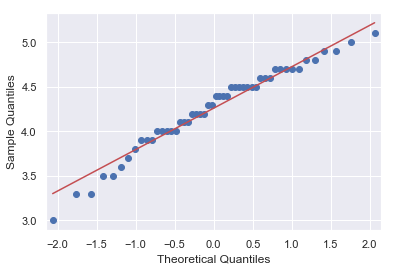

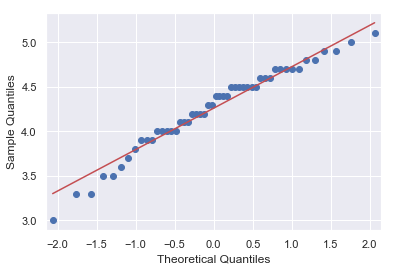

In [40]:
qqplot(versicolor['petal-length'], line='s')

In [41]:
# F test compare the variances of two normally distributed groups, determine whether the variances are equal. 
# there is no limitation on sample size.
# ANOVA (https://anaconda.org/anaconda-enterprise/univariate-and-bivariate-statistics/notebook)
# get sepal width for each species:
from scipy import stats
setosa = iris_df[iris_df.species == "Iris-setosa"]["sepal-width"]
versicolor = iris_df[iris_df.species == "Iris-versicolor"]["sepal-width"]
virginica = iris_df[iris_df.species == "Iris-virginica"]["sepal-width"]

f_val, p_val = stats.f_oneway(setosa, versicolor, virginica)  
print("ANOVA F value: {}\np-value: {}".format(f_val, p_val))

ANOVA F value: 48.822604769660494
p-value: 5.813443567711162e-17


In [42]:
# using statsmodel library
import statsmodels.api as sm
from statsmodels.formula.api import ols
sepal_width = iris_df.iloc[:,1]
all_species = iris_df.iloc[:,4]
results = ols('sepal_width ~ all_species', data=iris_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sepal_width   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     48.82
Date:                Mon, 27 May 2019   Prob (F-statistic):           5.81e-17
Time:                        16:44:21   Log-Likelihood:                -49.198
No. Observations:                 149   AIC:                             104.4
Df Residuals:                     146   BIC:                             113.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          3.4280      0.048     71.277      0.000       3.333       3.523
all_species[T.Iris-versicolor]    -0.6580      0.068     -9.674      0.000      -0.792      -0.524
all_species[T.Iris-virginica]     -0.4484      0.068     -6.559      0.000      -0.584      -0.313
==============================================================================
Omnibus:                        1.894   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.388   Jarque-Bera (JB):                1.602
Skew:                           0.016   Prob(JB):                        0.449
Kurtosis:                       3.507   Cond. No.                         3.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# we will build a model and run ANOVA using statsmodels 
# Columns Species and Sepal.Width contain independent (predictor) and dependent (response) variable values, correspondingly.
lm=ols('sepal_width ~ all_species', data=iris_df).fit()
anova = sm.stats.anova_lm(lm)
print(anova)

                df     sum_sq   mean_sq          F        PR(>F)
all_species    2.0  11.292997  5.646499  48.822605  5.813444e-17
Residual     146.0  16.885392  0.115653        NaN           NaN


The results tell us that there is a significant difference between groups means (p = 5.81e-17), 
but does not tell us the exact group pairs which are different in means. 

To obtain pairwise group differences, we will carry out a posteriori (post hoc) analysis using scikits-posthocs package. Student T test applied pairwisely gives us the following p values:

In [44]:
# common post hoc-test is Tukey's test. You can carry out Tukey's test using the pairwise_tukeyhsd() function in the statsmodels.stats.multicomp library: 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(sepal_width, all_species, alpha=0.05)

tukey.summary()              # See test summary

group1,group2,meandiff,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.658,-0.8191,-0.4969,True
Iris-setosa,Iris-virginica,-0.4484,-0.6103,-0.2865,True
Iris-versicolor,Iris-virginica,0.2096,0.0477,0.3715,True


# Principal Components Analysis in Python
https://www.kindsonthegenius.com/2019/01/12/principal-components-analysispca-in-python-step-by-step/

In [45]:
#  Import the Necessary Modules
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [46]:
# Preview Data
df=iris
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [47]:
# Perform Scaling on the Data
# separate the features from the target
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

x = df.loc[:, features].values

y = df.loc[:, ['species']].values

x = StandardScaler().fit_transform(x)  # scale the features

In [48]:
#  Perform PCA
pca = PCA()

principalComponents = pca.fit_transform(x)

principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3', 'PC4'])
principalDataframe.head()

,PC1,PC2,PC3,PC4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923


In [49]:
# Combine the Target and the Principal Components
target_names  = df['species'].unique()
#target_names 
targetDataframe = df[['species']]
newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)
newDataframe.head()

,PC1,PC2,PC3,PC4,species
0,-2.264703,0.480027,-0.127706,-0.024168,setosa
1,-2.080961,-0.674134,-0.234609,-0.103007,setosa
2,-2.364229,-0.341908,0.044201,-0.028377,setosa
3,-2.299384,-0.597395,0.091290,0.065956,setosa
4,-2.389842,0.646835,0.015738,0.035923,setosa


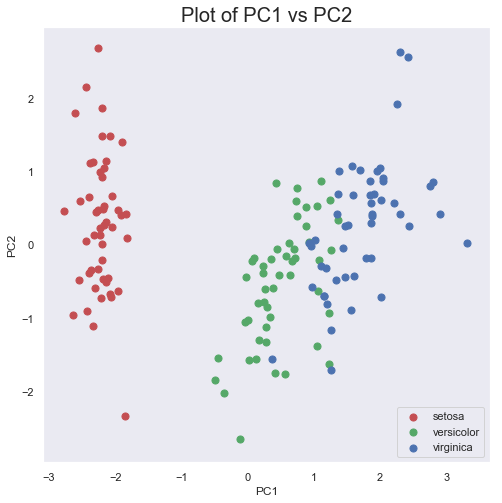

In [50]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('Plot of PC1 vs PC2', fontsize = 20)

targets = ['setosa', 'versicolor', 'virginica']

colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = newDataframe['species'] == target
    ax.scatter(newDataframe.loc[indicesToKeep, 'PC1']
               , newDataframe.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()

In [51]:
print ('explained variance ratio (all 4 components):', pca.explained_variance_ratio_)

explained variance ratio (all 4 components): [0.72962445 0.22850762 0.03668922 0.00517871]


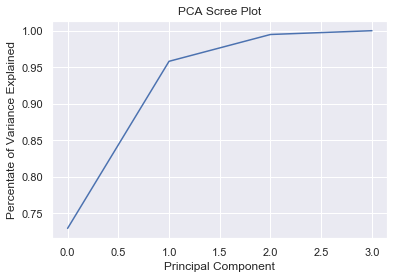

In [52]:
# Perform a Scree Plot of the Principal Components

percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4']
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()


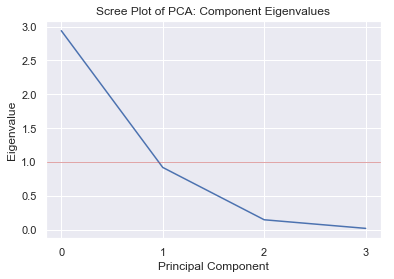

In [53]:
# http://jmausolf.github.io/code/pca_in_python/
# Visualizing Eigenvalues

def scree_plot():
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator

    ax = figure().gca()
    ax.plot(pca.explained_variance_)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    plt.axhline(y=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Scree Plot of PCA: Component Eigenvalues')
    show()

scree_plot()



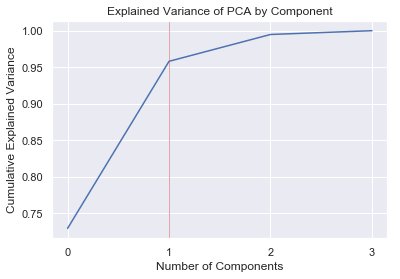

In [54]:
# http://jmausolf.github.io/code/pca_in_python/
# Variance Explained
# Related to scree plots and eigenvalues is the variance explained (which is directly related to the eigenvalues). This can also be visualized.
def var_explained():
    import numpy as np
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator

    ax = figure().gca()
    ax.plot(np.cumsum(pca.explained_variance_ratio_))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.axvline(x=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Explained Variance of PCA by Component')
    show()

var_explained()

### So approximately 92.5% of the variance is explained by the first principal component (component 0) and about 98% is explained by the first two components.


# Examining PCA Loadings
http://jmausolf.github.io/code/pca_in_python/   <br>
Another facet of PCA is examining the component loadings or components. This allows us to see how informative a particular variable is for the principal component. Paying attention to the loadings is particularly useful in scale construction using PCA (or PCA in combination with Cronbach's Alpha and Factor Analysis).


In [55]:
#Component Loadings

def loadings():
    loadings = pca.components_
    results = pd.DataFrame(loadings)
    results.columns = ['Component 1', 'Component 2', 'Component 3', 'Component 4']
    results.index=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']
    print(results)

loadings()

           Component 1  Component 2  Component 3  Component 4
sepal_len     0.521066    -0.269347     0.580413     0.564857
sepal_wid     0.377418     0.923296     0.024492     0.066942
petal_len    -0.719566     0.244382     0.142126     0.634273
petal_wid    -0.261286     0.123510     0.801449    -0.523597



In assessing the loadings, we are concerned with the magnitude of the loading on an absolute value scale [0,1], where values closer to one are viewed as more informative of the construct represented by the principal component.

For the loadings above, we can see that both sepal width and petal length are highly informative of the first component, which might be thought of as iris type.



# Standardizing Data

Note, to have comparable results running PCA in Python with other statistical programs, such as Stata, we will want to standardize the data we are analyzing. In Sklearn, this can be accomplished with StandardScaler.

Below, I repeat the PCA with standardized data.


In [56]:
X_std = StandardScaler().fit_transform(x)
X_r = pca.fit(X_std).transform(X_std)


loadings()

           Component 1  Component 2  Component 3  Component 4
sepal_len     0.521066    -0.269347     0.580413     0.564857
sepal_wid     0.377418     0.923296     0.024492     0.066942
petal_len    -0.719566     0.244382     0.142126     0.634273
petal_wid    -0.261286     0.123510     0.801449    -0.523597


Note, once the data is standardized, our factor loadings change. Whereas before sepal width and petal length were the most informative features, now sepal length and petal length are most informative.

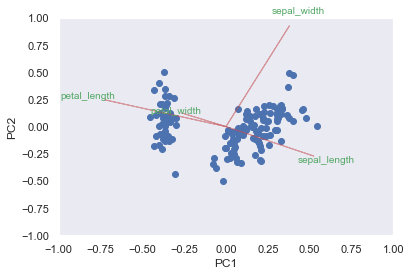

In [57]:

def biplot(score,coeff,pcax,pcay,labels=None):
    pca1=pcax-1
    pca2=pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n=score.shape[1]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5) 
        if labels is None:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()
biplot(principalComponents,pca.components_,1,2,features)
plt.show()

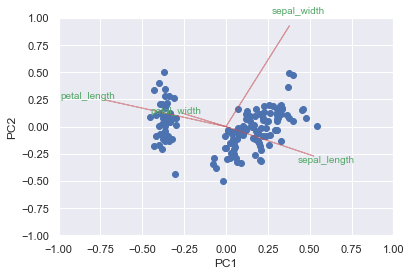

In [58]:
# https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
biplot(principalComponents,pca.components_,1,2,features)
plt.show()

In [59]:
from sklearn.preprocessing import StandardScaler
df2=iris.iloc[:,0:4]
df2.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [60]:
# https://github.com/teddyroland/python-biplot/blob/master/biplot.py
pca = PCA()
# defaults number of PCs to number of columns in imported data (ie number of
# features), but can be set to any integer less than or equal to that value

#pca.fit(df2)
principalComponents = pca.fit_transform(df2)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3', 'PC4'])
finalDf = pd.concat([principalDf, iris[['species']]], axis = 1)
finalDf.head()

,PC1,PC2,PC3,PC4,species
0,-2.684126,0.319397,-0.027915,-0.002262,setosa
1,-2.714142,-0.177001,-0.210464,-0.099027,setosa
2,-2.888991,-0.144949,0.017900,-0.019968,setosa
3,-2.745343,-0.318299,0.031559,0.075576,setosa
4,-2.728717,0.326755,0.090079,0.061259,setosa


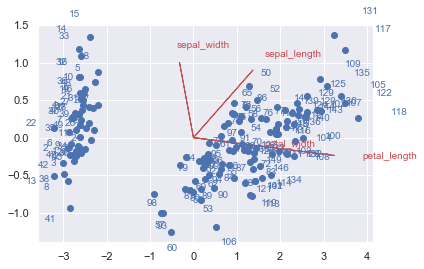

In [61]:
## project data into PC space

# 0,1 denote PC1 and PC2; change values for other PCs
xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(df2)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(df2)[:,1]




## visualize projections
    
## Note: scale values for arrows and text are a bit inelegant as of now,
##       so feel free to play around with them

for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(df2.columns.values)[i], color='r')

for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.plot(xs[i], ys[i], 'bo')
    plt.text(xs[i]*1.2, ys[i]*1.2, list(df2.index)[i], color='b')

plt.show()

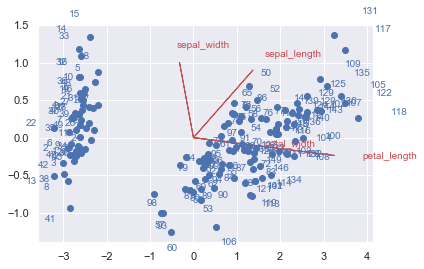

In [62]:
# https://github.com/teddyroland/python-biplot/blob/master/biplot.py
pca = PCA()
# defaults number of PCs to number of columns in imported data (ie number of
# features), but can be set to any integer less than or equal to that value

pca.fit(df2)



## project data into PC space

# 0,1 denote PC1 and PC2; change values for other PCs
xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(df2)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(df2)[:,1]




## visualize projections
    
## Note: scale values for arrows and text are a bit inelegant as of now,
##       so feel free to play around with them

for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(df2.columns.values)[i], color='r')

for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.plot(xs[i], ys[i], 'bo')
    plt.text(xs[i]*1.2, ys[i]*1.2, list(df2.index)[i], color='b')

plt.show()